In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler
%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.6.2'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures/final")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

# Fig 3: Neuroscience

## Import

In [7]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [8]:
tsne = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

In [9]:
# load
# legend colors
pickle_in = open(variables_path / "colors_new_legend.pkl", "rb")
colors_new_legend = pickle.load(pickle_in)

colors_new = np.load(variables_path / "colors_new.npy", allow_pickle=True)

In [10]:
# save
colors_per_year_reparsed = np.load(
    variables_path / "colors_per_year_reparsed.npy"
)

In [11]:
# load results
nsc_colors_reparsed = np.load(
    variables_path / "nsc_colors_reparsed.npy", allow_pickle=True
)

In [12]:
# legend colors
pickle_in = open(variables_path / "nsc_colors_reparsed_legend.pkl", "rb")
nsc_colors_reparsed_legend = pickle.load(pickle_in)

In [13]:
# load
gam_knn_overlap_plotting_results = pd.read_pickle(
    variables_path / "gam_knn_overlap_plotting_results"
)

In [14]:
gam_knn_overlap_plotting_results_T = (
    gam_knn_overlap_plotting_results.transpose()
)

In [15]:
average_knn_overlap = np.load(variables_path / "average_knn_overlap_nsc.npy")
individual_years = np.load(variables_path / "individual_years_nsc.npy")

In [16]:
individual_years_clean = individual_years[individual_years != -1]

## Plot

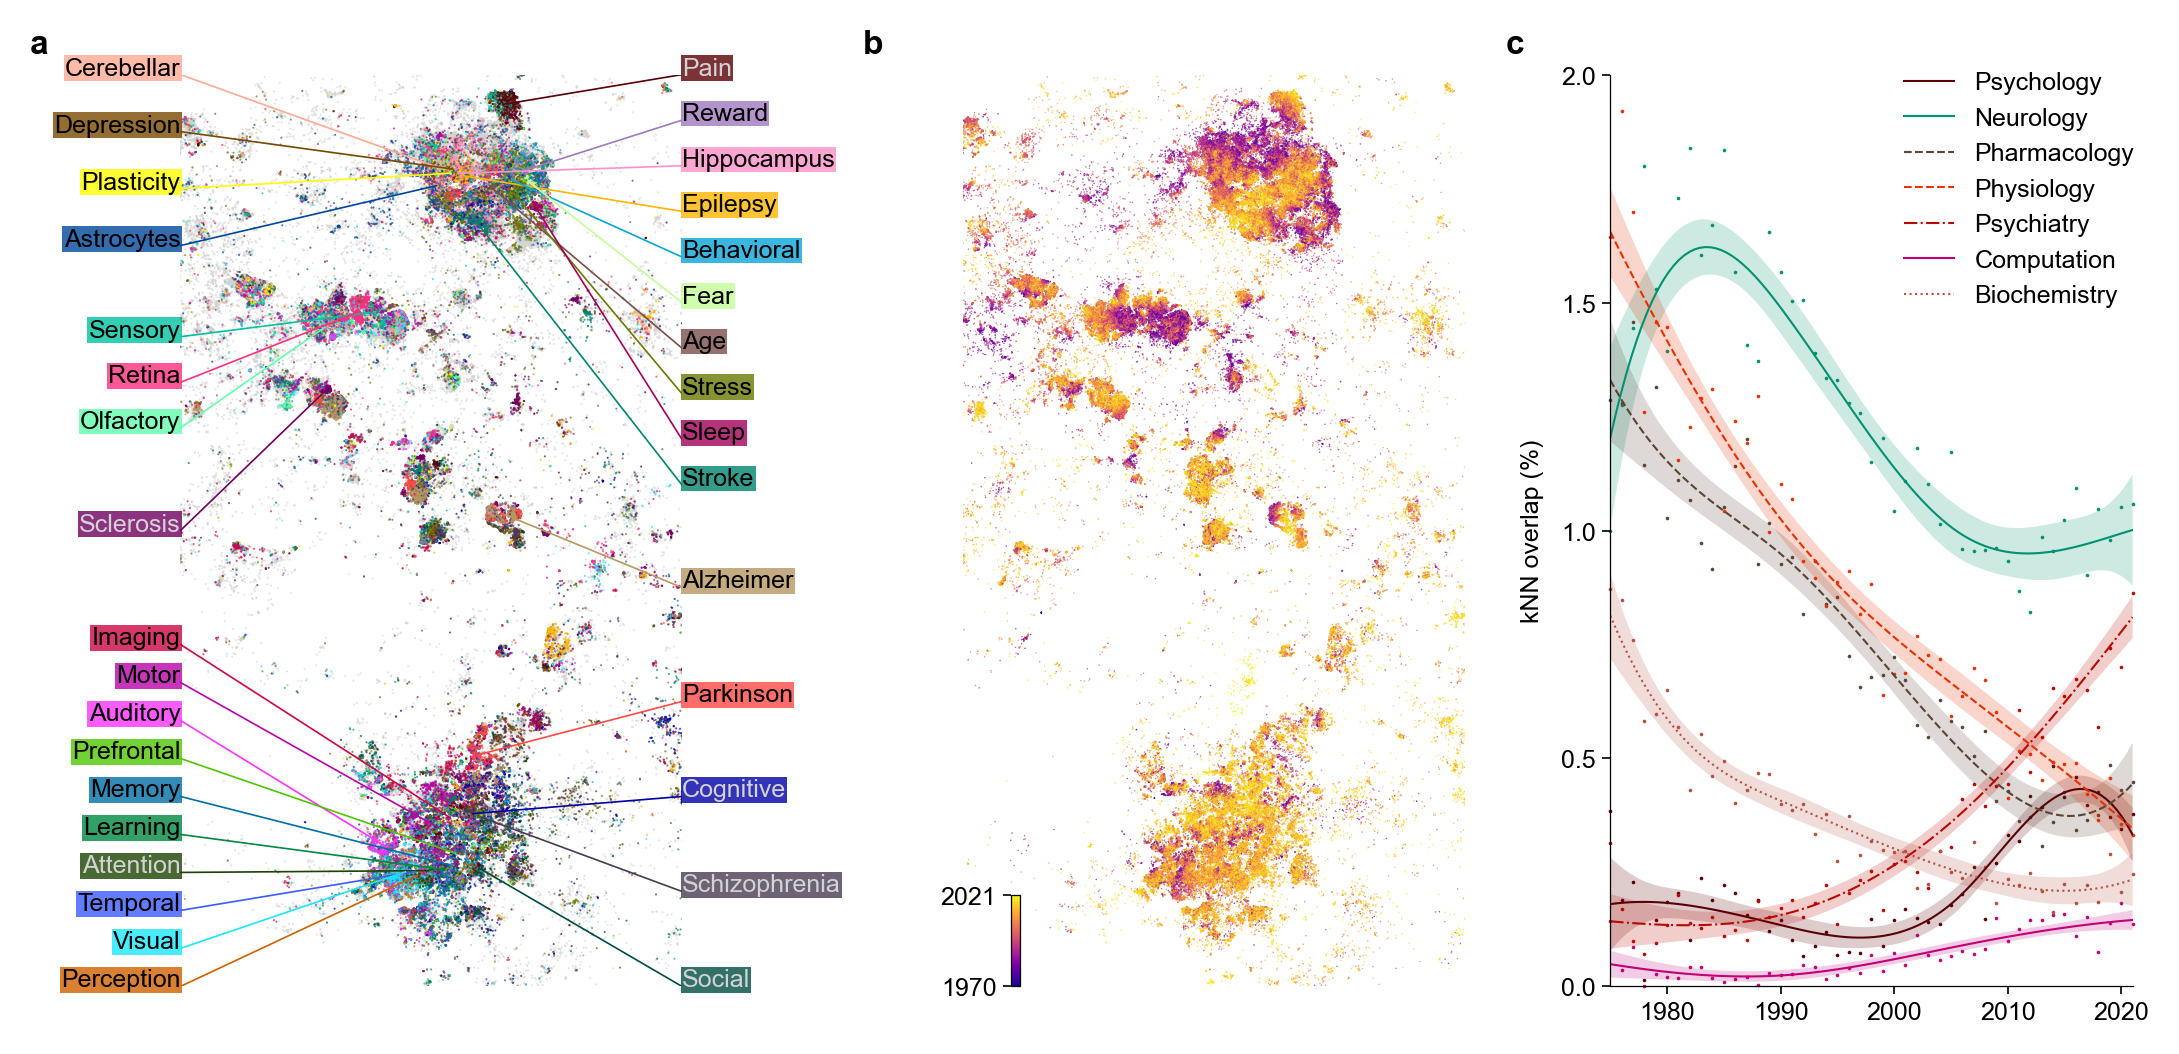

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(7.2, 3.4), dpi=300, layout="constrained")
gs = gridspec.GridSpec(1, 6, figure=fig)
txtkwargs = dict(size=8, weight="bold", va="top", ha="left")


# subplot 1
ax0 = plt.subplot(gs[0, :2])
tsne_nsc = tsne[colors_new == colors_new_legend["neuroscience"]]
x_lim = (-120, 100)
y_lim = (-200, 200)
plot_tsne_colors(
    tsne_nsc, nsc_colors_reparsed, x_lim, y_lim, ax=ax0, plot_type="subregion"
)
plot_nsc_label_tags(
    tsne_nsc,
    nsc_colors_reparsed,
    nsc_colors_reparsed_legend,
    x_lim,
    y_lim,
    ax=ax0,
    middle_value=0,
    fontsize=6,
    subset=False,
)
ax0.text(
    -0.3, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, **txtkwargs
)


# subplot 2
ax1 = plt.subplot(gs[0, 2:4])
x_lim = (-120, 100)
plot_tsne_years(
    tsne_nsc,
    colors_per_year_reparsed[colors_new == colors_new_legend["neuroscience"]],
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax1,
    fontsize=6,
    colorbar=True,
    plot_type="subregion",
    colorbar_type="neuroscience",
)
ax1.text(
    -0.2, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, **txtkwargs
)


# subplot c
ax2 = plt.subplot(gs[0, 4:])
years = np.arange(1970, 2022)
other_classes = [
    "psychology",
    "neurology",
    "pharmacology",
    "physiology",
    "psychiatry",
    "computation",
    "biochemistry",
]
linestyles = ["-", "-", "--", "--", "-.", "-", ":"]

for i, label in enumerate(other_classes):
    ax2.plot(
        gam_knn_overlap_plotting_results_T.XX[label][:, 0],
        gam_knn_overlap_plotting_results_T.pdep[label],
        c=colors_new_legend[label],
        label=label.capitalize(),
        linestyle=linestyles[i],
    )

    ax2.fill_between(
        gam_knn_overlap_plotting_results_T.XX[label][:, 0],
        gam_knn_overlap_plotting_results_T.confi[label][:, 1],
        gam_knn_overlap_plotting_results_T.confi[label][:, 0],
        color=colors_new_legend[label],
        alpha=0.2,
        edgecolor=None,
    )

    ax2.scatter(
        np.unique(individual_years_clean)[average_knn_overlap[:, i] != -1],
        average_knn_overlap[:, i][average_knn_overlap[:, i] != -1] * 10,
        c=colors_new_legend[label],
        marker=".",
        s=3,
        clip_on=False,
        linewidths=0,
    )


ax2.set_xlim(left=1975, right=2021)
ax2.set_ylim(bottom=0, top=2)
ax2.set_yticks([0, 0.5, 1, 1.5, 2])
ax2.legend(
    loc="lower left", bbox_to_anchor=(0.52, 0.72), fontsize=6, frameon=False
)
ax2.set_ylabel("kNN overlap (%)", fontsize=6)
ax2.text(
    -0.2, 1.05, string.ascii_lowercase[2], transform=ax2.transAxes, **txtkwargs
)


fig.savefig(figures_path / "fig_3_nsc.png")
fig.savefig(figures_path / "fig_3_nsc.pdf")